<a href="https://colab.research.google.com/github/wigwej/neural_network_charity_analysis_code/blob/main/AlphabetSoupCharity_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv('/content/charity_data (4).csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
print (application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
print(application_df['APPLICATION_TYPE'].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


(0.0, 5000.0)

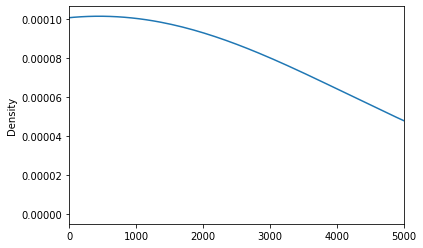

In [5]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt

application_df['APPLICATION_TYPE'].value_counts().plot.density()
plt.xlim(left=0,right=5000)

In [6]:
app_counts=application_df['APPLICATION_TYPE'].value_counts()

In [7]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application=list(app_counts[app_counts<500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
print(application_df['CLASSIFICATION'].value_counts())

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


(0.0, 5000.0)

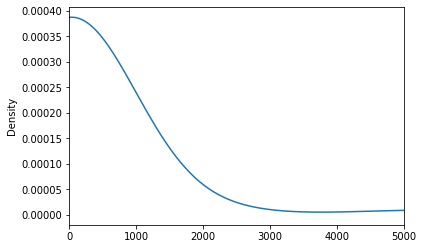

In [9]:
# Visualize the value counts of CLASSIFICATION

application_df['CLASSIFICATION'].value_counts().plot.density()
plt.xlim(left=0,right=5000)

In [10]:
class_counts=application_df['CLASSIFICATION'].value_counts()

In [11]:
# Determine which values to replace if counts are less than ..?

replace_class=list(class_counts[class_counts<1000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
app_categores=application_df.dtypes[application_df.dtypes == "object"].index.tolist()







In [15]:

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(encoder.fit_transform(application_df[app_categores]))

# Add the encoded variable names to the dataframe
encode_df.columns = encoder.get_feature_names(app_categores)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
final_df=application_df.merge(encode_df,left_index=True,right_index=True)
final_df.drop(app_categores,axis=1, inplace=True)
print(final_df)

       STATUS   ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0           1      5000              1                     0.0   
1           1    108590              1                     0.0   
2           1      5000              0                     0.0   
3           1      6692              1                     0.0   
4           1    142590              1                     0.0   
...       ...       ...            ...                     ...   
34294       1      5000              0                     0.0   
34295       1      5000              0                     0.0   
34296       1      5000              0                     0.0   
34297       1      5000              1                     0.0   
34298       1  36500179              0                     0.0   

       APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                       1.0                   0.0                  0.0   
1                       0.0                   0.0          

In [20]:
# Split our preprocessed data into our features and target arrays

X = final_df.drop(columns="IS_SUCCESSFUL")

# Create our target
y = final_df.IS_SUCCESSFUL


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)


In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()
hidden_node_layer_1= 2
hidden_node_layer_2 = 3
# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_node_layer_1,input_dim=len(X.columns),activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_node_layer_2,activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 88        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
# Train the model
nn.fit(X_train_scaled, y_train,validation_split=0.1,epochs=50)

Epoch 1/50
724/724 [==============================] - 3s 3ms/step - loss: 0.6601 - accuracy: 0.5967 - val_loss: 0.6411 - val_accuracy: 0.6564
Epoch 2/50
724/724 [==============================] - 2s 2ms/step - loss: 0.6265 - accuracy: 0.6696 - val_loss: 0.6235 - val_accuracy: 0.6766
Epoch 3/50
724/724 [==============================] - 2s 2ms/step - loss: 0.6148 - accuracy: 0.6812 - val_loss: 0.6161 - val_accuracy: 0.6786
Epoch 4/50
724/724 [==============================] - 2s 2ms/step - loss: 0.6115 - accuracy: 0.6823 - val_loss: 0.6129 - val_accuracy: 0.6817
Epoch 5/50
724/724 [==============================] - 2s 2ms/step - loss: 0.6092 - accuracy: 0.6869 - val_loss: 0.6057 - val_accuracy: 0.6957
Epoch 6/50
724/724 [==============================] - 2s 2ms/step - loss: 0.6021 - accuracy: 0.6977 - val_loss: 0.6024 - val_accuracy: 0.6976
Epoch 7/50
724/724 [==============================] - 2s 2ms/step - loss: 0.6011 - accuracy: 0.6980 - val_loss: 0.6020 - val_accuracy: 0.6976
Epoch 

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5692 - accuracy: 0.7120 - 333ms/epoch - 1ms/step
Loss: 0.5691792964935303, Accuracy: 0.711953341960907


In [28]:
nn.save('deliverable1.h5')